# CODING TASK #1: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# For Autogluon to work in Google Colab, you need to install ipykernel and restart the notebook
# The IPython kernel is the Python execution backend for Jupyter
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.1 which is incompatible.


In [4]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/c7/42/be1c7bbdd83e1bfb160c94b9cafd8e25efc7400346cf7ccdbdb452c467fa/setuptools-68.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Obtaining dependency information for autogluon from https://files.pythonhosted.org/packages/2e/42/f26592ecf3dc4e4edcbc5f7f7e3deba25b0681fad2ad04a82d12af17e3a4/autogluon-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.core[all]==0.8.2 from https://files.pythonhosted.org/packages/e0/56/545adb1d388e78591cd7e36de0c8b889c1944de362bdaeec0f31d01890df/autogluon.core-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.features==0.8.2 from https://files.pythonhosted.org/packages/bb/ea/7892719f78a30aee1bf42c4a0540fbae98bfbdf56b85fab79ffc437eb687/autogluon.features-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.tabular[all]==0.8.2 from https://files.pythonhosted.

In [5]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Colab Notebooks/335 Machine Learning/Lecture6-Regression-on-Autopilot/"

/content/drive/MyDrive/Colab Notebooks/335 Machine Learning/Lecture6-Regression-on-Autopilot


In [7]:
# Read the CSV file
life_df = pd.read_csv("Life_Expectancy_Data.csv")

In [8]:
# Check data types of each column ->.dtypes
life_df.dtypes

Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

**# Step2: ให้ Check missing value และถ้าในกรณีที่มี missing value ให้เติมค่า Null ด้วย ค่า Mean (ในกรณีที่ข้อมูลเป็นตัวเลข)**

In [9]:
# Check if any missing values are present in the dataframe -> .isnull().sum()
life_df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
life_df.fillna(life_df.mean().round(1), inplace=True)

<ipython-input-10-6de313862e7c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  life_df.fillna(life_df.mean().round(1), inplace=True)


In [11]:
life_df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**# Step3: ในกรณีที่ตัวข้อมูลเป็นกลุ่มของข้อมูล (ข้อความ string, text) ให้เปลี่ยน column นั้น ให้เป็น one hot encoder**

In [12]:
life_df.astype({'Year': 'category','Status': 'category'}).dtypes

Year                               category
Status                             category
Life expectancy                     float64
Adult Mortality                     float64
infant deaths                         int64
Alcohol                             float64
percentage expenditure              float64
Hepatitis B                         float64
Measles                               int64
 BMI                                float64
under-five deaths                     int64
Polio                               float64
Total expenditure                   float64
Diphtheria                          float64
 HIV/AIDS                           float64
GDP                                 float64
Population                          float64
 thinness  1-19 years               float64
 thinness 5-9 years                 float64
Income composition of resources     float64
Schooling                           float64
dtype: object

In [13]:
ohe = pd.get_dummies(data=life_df, columns=['Year','Status'])

In [14]:
ohe.head(6)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,1,0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,1,0,0,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,1,0,0,0,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,1,0,0,0,0,0,1
5,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,...,0,0,1,0,0,0,0,0,0,1


In [15]:
ohe.shape

(2938, 37)

**# Step5: เตรียมข้อมูลสำหรับ Training data และ Testing data**

In [16]:
# spliting the data into test 20% and train sets 80%
#Training Data เอาไว้สร้าง Model
#Testing Data เอาไว้ทดสอบประสิทธิภาพของ Model

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(ohe, test_size=0.2, random_state=42)

In [17]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

**# Step6: TRAIN MULTIPLE MODELS USING AUTOGLUON**

In [18]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label="Life expectancy ", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230815_014200/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20230815_014200/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jun 9 10:57:30 UTC 2023
Disk Space Avail:   14.76 GB / 16.11 GB (91.7%)
Train Data Rows:    2350
Train Data Columns: 36
Label Column: Life expectancy 
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12559.78 MB
	Train Data (Original)  Memory Usage: 0.38 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stag

In [19]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2   0.961871       1.092004  118.039505                0.001100           0.488571            2       True          5
1        LightGBM_BAG_L1   0.960760       0.374745   46.240095                0.374745          46.240095            1       True          4
2      LightGBMXT_BAG_L2   0.958578       1.573778  170.420037                0.083983          52.787298            2       True          6
3    WeightedEnsemble_L3   0.958578       1.575307  170.434145                0.001529           0.014108            3       True          7
4      LightGBMXT_BAG_L1   0.955873       0.716159   71.310839                0.716159          71.310839            1       True          3
5  KNeighborsUnif_BAG_L1   0.152289       0.260105    0.050714                0.260105      

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.1522889447560325,
  'KNeighborsDist_BAG_L1': 0.13744528924702082,
  'LightGBMXT_BAG_L1': 0.9558731419091026,
  'LightGBM_BAG_L1': 0.9607602650046154,
  'WeightedEnsemble_L2': 0.9618712872431695,
  'LightGBMXT_BAG_L2': 0.9585779367678525,
  'WeightedEnsemble_L3': 0.9585779367678525},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230815_014200/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist_BAG_L1': 'AutogluonModels/ag-20230815_014200/models/KNeighborsDist_BAG_L1/',
  'LightGBMXT_BAG_L1': 'AutogluonModels/ag-202

**# Step7: Testing and Evaluating the Performance of Model (ทดสอบประสิทธิภาพของ Model)**

In [20]:
predictor.leaderboard()

                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2   0.961871       1.092004  118.039505                0.001100           0.488571            2       True          5
1        LightGBM_BAG_L1   0.960760       0.374745   46.240095                0.374745          46.240095            1       True          4
2      LightGBMXT_BAG_L2   0.958578       1.573778  170.420037                0.083983          52.787298            2       True          6
3    WeightedEnsemble_L3   0.958578       1.575307  170.434145                0.001529           0.014108            3       True          7
4      LightGBMXT_BAG_L1   0.955873       0.716159   71.310839                0.716159          71.310839            1       True          3
5  KNeighborsUnif_BAG_L1   0.152289       0.260105    0.050714                0.260105           0.050714            1       True          1
6  KNeighbors

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.961871,1.092004,118.039505,0.001100,0.488571,2,True,5
1,LightGBM_BAG_L1,0.960760,0.374745,46.240095,0.374745,46.240095,1,True,4
2,LightGBMXT_BAG_L2,0.958578,1.573778,170.420037,0.083983,52.787298,2,True,6
3,WeightedEnsemble_L3,0.958578,1.575307,170.434145,0.001529,0.014108,3,True,7
4,LightGBMXT_BAG_L1,0.955873,0.716159,71.310839,0.716159,71.310839,1,True,3
5,KNeighborsUnif_BAG_L1,0.152289,0.260105,0.050714,0.260105,0.050714,1,True,1
6,KNeighborsDist_BAG_L1,0.137445,0.138786,0.031090,0.138786,0.031090,1,True,2


                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2   0.961871       1.092004  118.039505                0.001100           0.488571            2       True          5
1        LightGBM_BAG_L1   0.960760       0.374745   46.240095                0.374745          46.240095            1       True          4
2      LightGBMXT_BAG_L2   0.958578       1.573778  170.420037                0.083983          52.787298            2       True          6
3    WeightedEnsemble_L3   0.958578       1.575307  170.434145                0.001529           0.014108            3       True          7
4      LightGBMXT_BAG_L1   0.955873       0.716159   71.310839                0.716159          71.310839            1       True          3
5  KNeighborsUnif_BAG_L1   0.152289       0.260105    0.050714                0.260105           0.050714            1       True          1
6  KNeighbors

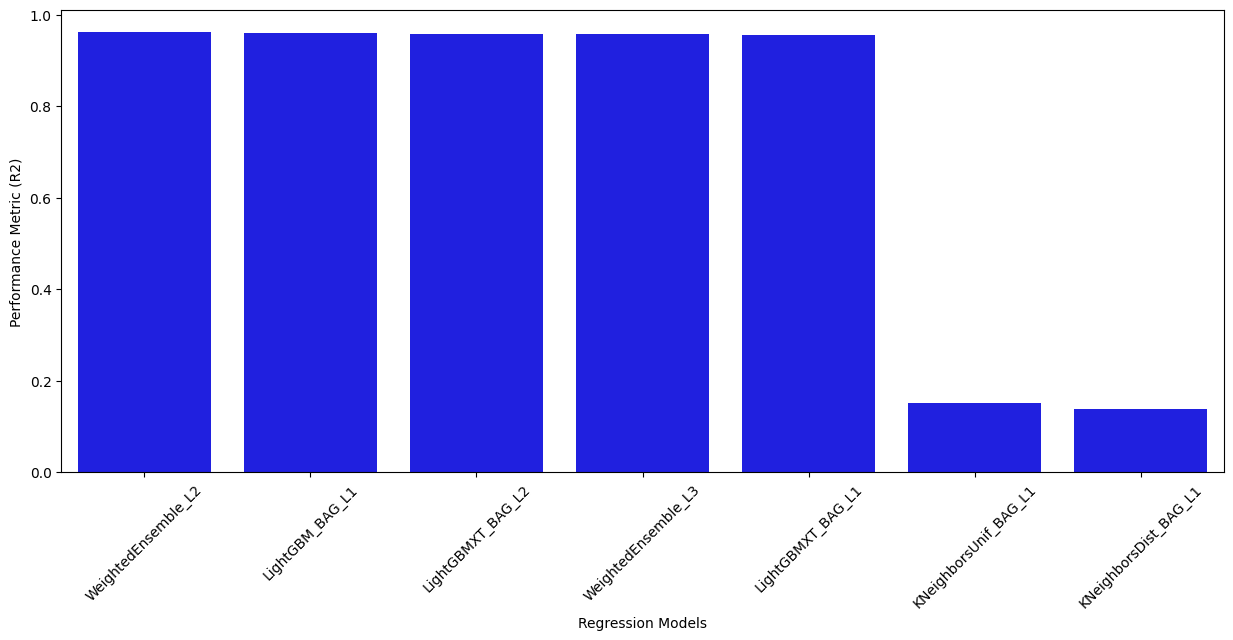

In [21]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [22]:
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.9693715702545815
Evaluations on test data:
{
    "r2": 0.9693715702545815,
    "root_mean_squared_error": -1.6289571744592573,
    "mean_squared_error": -2.653501476222287,
    "mean_absolute_error": -1.0824504800394281,
    "pearsonr": 0.9845843849601826,
    "median_absolute_error": -0.673841094970701
}


{'r2': 0.9693715702545815,
 'root_mean_squared_error': -1.6289571744592573,
 'mean_squared_error': -2.653501476222287,
 'mean_absolute_error': -1.0824504800394281,
 'pearsonr': 0.9845843849601826,
 'median_absolute_error': -0.673841094970701}

In [23]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [72.7677230834961, 75.38704681396484, 74.94386291503906, 76.32704162597656, 51.503440856933594]


In [24]:
y_test = X_test['Life expectancy ']
y_test #groundtruth

2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
        ... 
859     59.7
1405    73.5
962     61.1
2658    69.6
2272    74.0
Name: Life expectancy , Length: 588, dtype: float64

In [25]:
y_predict = predictor.predict(X_test)

In [26]:
y_predict

2546    72.767723
650     75.387047
1740    74.943863
177     76.327042
1377    51.503441
          ...    
859     59.961586
1405    73.607285
962     63.787163
2658    70.865120
2272    73.887993
Name: Life expectancy , Length: 588, dtype: float32

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 1.629 
MSE = 2.653501476222287 
MAE = 1.0824504800394281 
R2 = 0.9693715702545815


**# Step8: Deployment โดยทำการ Save AI Model ที่ได้ เพื่อนำไปใช้ในการ deployement กับข้อมูลชุดใหม่ ที่ไม่ทราบค่า Output (ให้ Model Predict output)**

In [28]:
# loading library
import pickle

In [29]:
# create an iterator object with write permission - model.pickle and save model
with open('life_autopilot', 'wb') as files:
    pickle.dump(predictor, files)

In [30]:
# load saved model
with open('life_autopilot' , 'rb') as f:
    lr = pickle.load(f)

In [31]:
# นำข้อมูลชุดใหม่มาทำการ prediction
#จากตัวอย่างเลือกเอาข้อมูล 5 แถวแรกจากตัวแปร X มาใช้ในการ deployment
X = ohe.drop(columns = ['Life expectancy '])
deploy_df=X.head(6)

In [32]:
#ใช้ model ที่ load มาทำการ predict ข้อมูลชุดใหม่
deploy_Y = lr.predict(deploy_df)
deploy_Y

0    64.221436
1    59.999603
2    60.791992
3    60.141151
4    59.095535
5    58.801300
Name: Life expectancy , dtype: float32

In [33]:
pd.concat([deploy_Y, deploy_df], axis=1)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,64.221436,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,1,0,1
1,59.999603,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,1,0,0,1
2,60.791992,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,1,0,0,0,1
3,60.141151,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,1,0,0,0,0,1
4,59.095535,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,1,0,0,0,0,0,1
5,58.801300,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,...,0,0,1,0,0,0,0,0,0,1
